# Python Project 2
California Wildfire Damage analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("E:\Diwali sales analysis python\California Wildfire Damage.csv")

In [4]:
df.shape

(100, 11)

In [5]:
df.head(10)

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown
5,INC1005,2023-05-17,Butte County,48348,60,205,21,58,2,4458.29,Human Activity
6,INC1006,2018-04-29,San Diego County,16038,1404,137,64,13,11,713.80,Human Activity
7,INC1007,2015-08-23,Napa Valley,24519,121,28,125,0,5,2001.33,Lightning
8,INC1008,2023-12-08,Sonoma County,20418,299,264,208,33,4,1012.23,Unknown
9,INC1009,2018-12-01,Butte County,21351,275,196,153,41,2,2611.90,Lightning


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float64(1), int64

In [54]:
# change data type
df['Estimated_Financial_Loss (Million $)'] = pd.to_numeric(df['Estimated_Financial_Loss (Million $)'], errors='coerce').fillna(0)


In [55]:
# check for null values
pd.isnull(df).sum()

Incident_ID                             0
Date                                    0
Location                                0
Damage_Area                             0
Homes_Destroyed                         0
Businesses_Destroyed                    0
Vehicles_Damaged                        0
Injuries                                0
Fatalities                              0
Estimated_Financial_Loss (Million $)    0
Cause                                   0
Year                                    0
dtype: int64

In [56]:
df.rename(columns={"Area_Burned (Acres)": "Damage_Area"}, inplace=True)
df

,Incident_ID,Date,Location,Damage_Area,Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270,Lightning,2020
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381,Lightning,2021
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421,Human Activity,2022
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964,Unknown,2021
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800,Unknown,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
95,INC1095,2018-01-16,Mendocino County,13112,1468,46,281,89,17,4008,Human Activity,2018
96,INC1096,2022-07-07,Shasta County,39209,710,282,189,34,14,376,Human Activity,2022
97,INC1097,2016-05-18,Shasta County,11863,702,9,40,100,1,1474,Human Activity,2016
98,INC1098,2014-06-24,Napa Valley,1338,1619,262,293,94,3,3308,Human Activity,2014


In [57]:
df.describe()

,Damage_Area,Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Year
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,26531.460000,941.890000,251.570000,150.330000,42.040000,9.930000,2395.570000,2018.640000
std,14282.123824,543.019967,138.317761,88.471197,29.201467,5.682251,1430.435586,3.036878
min,357.000000,18.000000,4.000000,5.000000,0.000000,0.000000,52.000000,2014.000000
25%,15916.250000,501.000000,134.750000,70.750000,16.000000,5.000000,1174.750000,2016.000000
50%,25618.000000,908.500000,256.500000,150.500000,37.000000,10.000000,2408.000000,2019.000000
75%,39775.000000,1401.750000,371.000000,229.750000,60.000000,14.250000,3661.750000,2021.000000
max,49653.000000,1968.000000,493.000000,300.000000,100.000000,20.000000,4866.000000,2023.000000


In [58]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df.drop(['Date', 'Day', 'Month'],axis = 1, inplace = True)

KeyError: "['Day', 'Month'] not found in axis"

In [59]:
df.drop(['Date'], axis = 1, inplace = True)
df

,Incident_ID,Location,Damage_Area,Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year
0,INC1000,Sonoma County,14048,763,474,235,70,19,2270,Lightning,2020
1,INC1001,Sonoma County,33667,1633,4,263,100,2,1381,Lightning,2021
2,INC1002,Shasta County,26394,915,291,31,50,6,2421,Human Activity,2022
3,INC1003,Sonoma County,20004,1220,128,34,28,0,3964,Unknown,2021
4,INC1004,Sonoma County,40320,794,469,147,0,15,1800,Unknown,2021
...,...,...,...,...,...,...,...,...,...,...,...
95,INC1095,Mendocino County,13112,1468,46,281,89,17,4008,Human Activity,2018
96,INC1096,Shasta County,39209,710,282,189,34,14,376,Human Activity,2022
97,INC1097,Shasta County,11863,702,9,40,100,1,1474,Human Activity,2016
98,INC1098,Napa Valley,1338,1619,262,293,94,3,3308,Human Activity,2014


# Exploratary  Data analysis

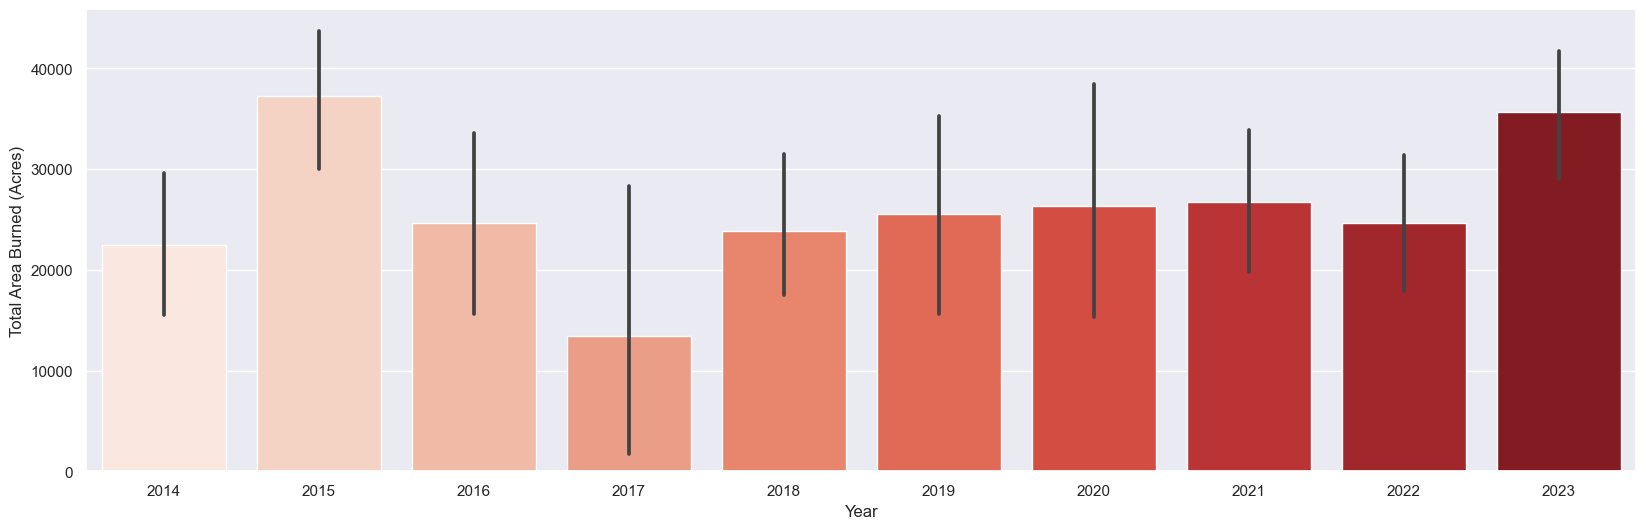

In [66]:
#  inrease of wildfire over time
ax = df.groupby(['Year'], as_index = False)['Damage_Area'].sum().sort_values(by = 'Year', ascending =False).head(10)
ax =  sns.barplot(data = df, x = 'Year', y = 'Damage_Area',  palette = 'Reds')
sns.set(rc = {'figure.figsize': [12,6]})
plt.xlabel("Year")
plt.ylabel("Total Area Burned (Acres)")
plt.show()
for bars in ax.containers:
    ax.bar_label(bars)

Wildfire damage peaked in 2015 and 2023, possibly due to severe droughts or increased wildfire incidents. In contrast, 2017 saw fewer damages, which could indicate better fire management or weather conditions.”



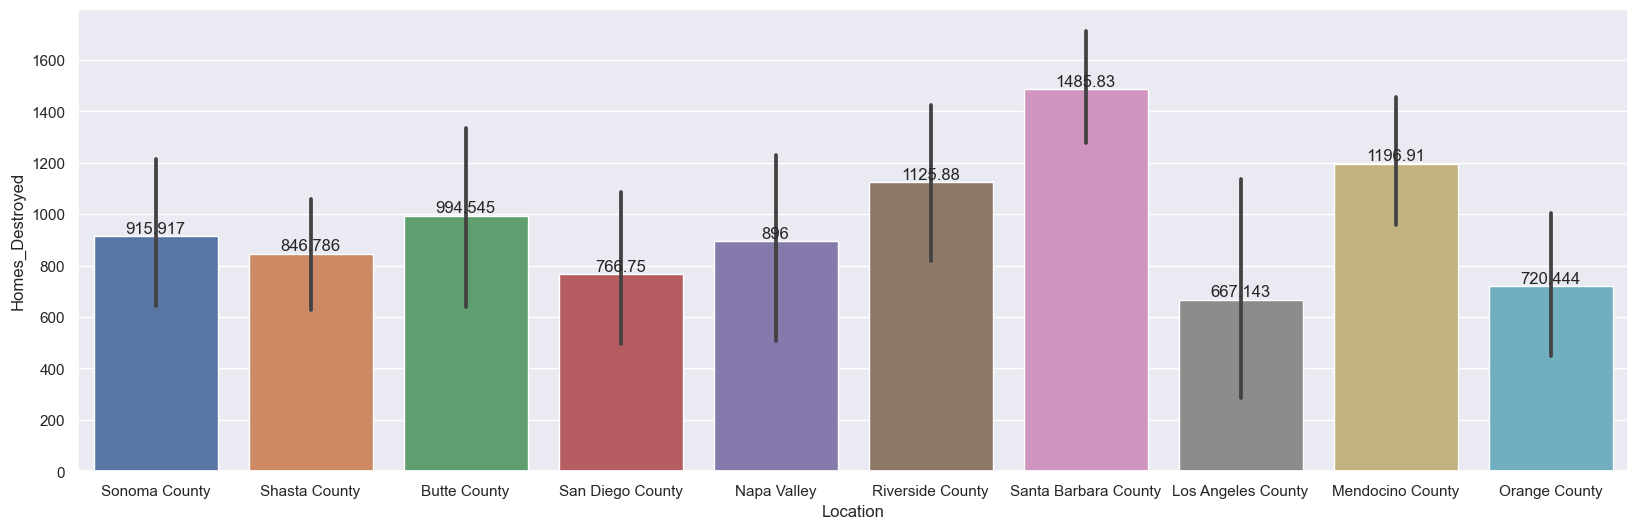

In [61]:
# Property destroyed in different region
ax = df.groupby(['Location','Homes_Destroyed'], as_index = False)['Homes_Destroyed'].sum().sort_values(by = 'Homes_Destroyed', ascending =False)
ax =  sns.barplot(data = df, y = 'Homes_Destroyed', x = 'Location')
sns.set(rc = {'figure.figsize': [30,15]})
for bars in ax.containers:
    ax.bar_label(bars)

Certain regions suffered significantly higher home losses, likely due to dense residential areas near fire-prone regions.
Some locations saw lower destruction, possibly due to better firefighting response or fewer structures in fire zones.

Fatalities and Injuries

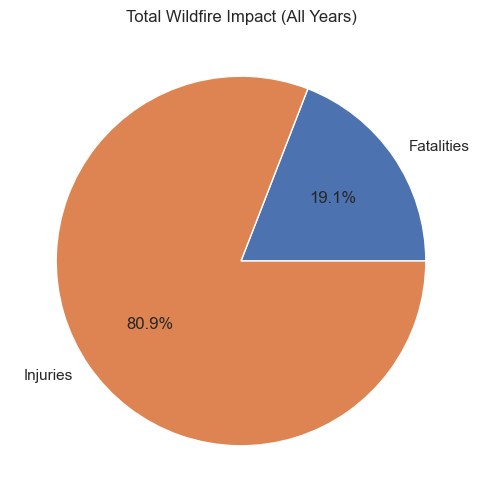

In [62]:
total_data = df[['Fatalities', 'Injuries']].sum()
plt.figure(figsize = (6,6))
plt.pie(total_data, labels=['Fatalities', 'Injuries'], autopct = '%1.1f%%')
plt.title("Total Wildfire Impact (All Years)")
plt.show()

E:\ae\Lib\site-packages\seaborn\distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


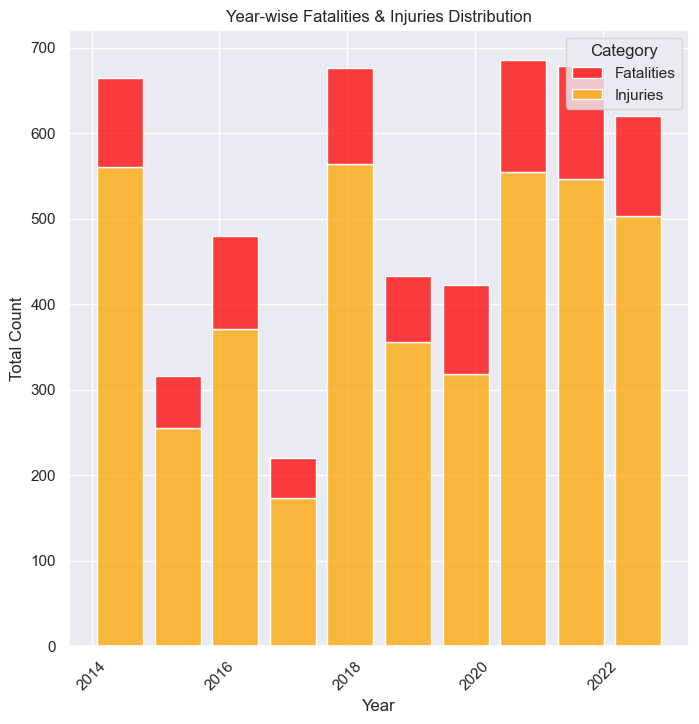

In [63]:
# Convert data into a long format
df_melted = df.melt(id_vars=['Year'], value_vars=['Fatalities', 'Injuries'], var_name='Category', value_name='Count')

# Plot stacked pie chart using Seaborn
plt.figure(figsize=(8, 8))
sns.histplot(df_melted, x='Year', weights='Count', hue='Category', multiple='stack', shrink=0.8, palette=['red', 'orange'])

plt.title("Year-wise Fatalities & Injuries Distribution")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.show()


The majority of wildfire-related human impact comes from injuries, rather than fatalities.
This suggests improved evacuation measures, but still highlights the severe risk of wildfires to human life.
Even if fatalities are low, the high number of injuries suggests that many individuals require medical attention or suffer from burns/smoke inhalation.

Financial Loss Over Time

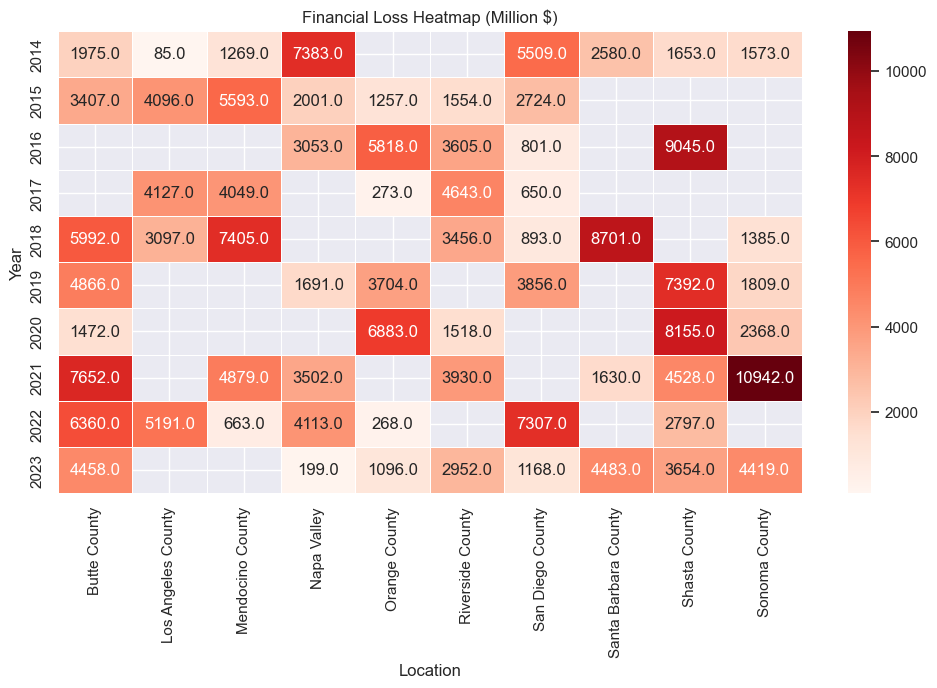

In [64]:
# Pivot table to make Year as rows, Location as columns, and Financial Loss as values
df_pivot = df.pivot_table(index='Year', columns='Location', values='Estimated_Financial_Loss (Million $)', aggfunc='sum')

# Plot Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_pivot, cmap="Reds", annot=True, fmt=".1f", linewidths=0.5)

plt.title("Financial Loss Heatmap (Million $)")
plt.xlabel("Location")
plt.ylabel("Year")
plt.show()


Some years had significantly higher financial losses, correlating with peak wildfire years (2015, 2023).
Certain locations show repeated high losses, suggesting fire-prone areas where more infrastructure is affected.
Regions with lower losses could indicate successful fire prevention policies or fewer urban structures.

# Wildfire Causes Over the Years

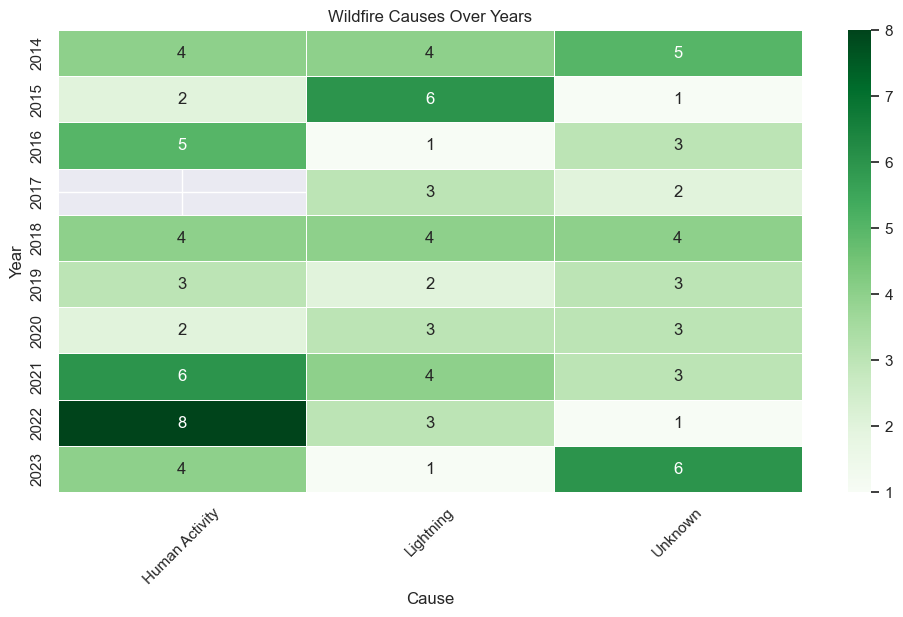

In [40]:
df_grouped = df.groupby(['Year', 'Cause']).size().reset_index(name='Count')

df_pivot = df_grouped.pivot(index='Year', columns='Cause', values='Count')

# Plot Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_pivot, cmap="Greens", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Wildfire Causes Over Years")
plt.xlabel("Cause")
plt.ylabel("Year")
plt.xticks(rotation=45)  # Rotate cause names for better readability
plt.show()

Certain causes are more frequent in specific years, suggesting changes in environmental conditions or human activity.
If human-caused fires increase over time, it indicates poor fire management or increased urban expansion into fire-prone zones.
If natural causes (e.g., lightning) remain stable, it suggests that climate and natural factors play a consistent role in wildfires

Correlation Between Fire Damage, Financial Loss & Homes Destroyed

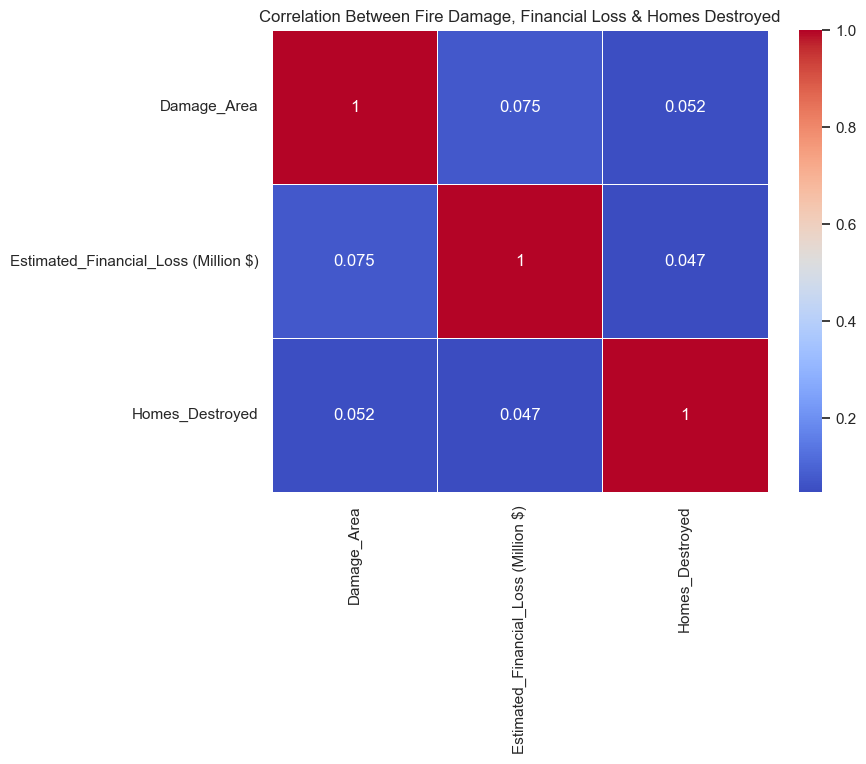

In [68]:
df['Estimated_Financial_Loss (Million $)'] = pd.to_numeric(df['Estimated_Financial_Loss (Million $)'], errors='coerce')
df['Damage_Area'] = pd.to_numeric(df['Damage_Area'], errors='coerce')
df['Homes_Destroyed'] = pd.to_numeric(df['Homes_Destroyed'], errors='coerce')

# Select relevant columns
correlation_data = df[['Damage_Area', 'Estimated_Financial_Loss (Million $)', 'Homes_Destroyed']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Between Fire Damage, Financial Loss & Homes Destroyed")
plt.show()